***Exploratory Data Analysis of Parkinson's Disease Data***

This notebook contains exploratory data analysis (EDA) of Parkinson's disease data. We will use Python and several libraries including Pandas, Seaborn, Matplotlib, and Scipy to perform the EDA. Our analysis will include a hypothesis test to compare the means of total_UPDRS between men and women.

Parkinson's disease is a progressive nervous system disorder that affects movement. It is caused by the loss of dopamine-producing cells in the brain. Symptoms include tremors, stiffness, and difficulty with balance and coordination.

EDA stands for exploratory data analysis, which is the process of exploring and analyzing data to understand its main characteristics, patterns, and relationships. EDA is an important step in any data analysis project, as it helps to identify the type of data, the presence of outliers, and the presence of missing values. It also helps to identify the distribution of the data and the presence of any outliers. EDA also helps to identify the relationship between the variables and the target variable.

We will import the necessary libraries for this EDA:

**Import Libraries**

First, we will import the necessary libraries for this EDA:

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

**Read Data**

Next, we will read in the data from the CSV file using the Pandas read_csv() function:

In [65]:
parkinsons_data = pd.read_csv('./data/parkinsons_updrs.csv')


**Initial Data Exploration**

We will start our EDA by exploring the data using the following methods and attributes of the Pandas DataFrame: head(), shape and describe().

The method head() displays the first few rows of the data:

In [66]:
parkinsons_data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,61.669,30.177,38.353,0.00292,0.000018,0.00091,0.00133,...,0.168,0.00782,0.01017,0.01940,0.02345,0.004080,26.311,0.46007,0.57198,0.15523
1,1,72,0,68.688,30.424,38.849,0.00340,0.000017,0.00161,0.00174,...,0.316,0.02120,0.02195,0.03069,0.06360,0.005567,25.399,0.45462,0.56983,0.16291
2,1,72,0,75.654,30.670,39.340,0.00379,0.000021,0.00149,0.00176,...,0.198,0.01045,0.01124,0.01614,0.03134,0.015468,25.512,0.45369,0.56939,0.17577
3,1,72,0,82.653,30.917,39.834,0.00736,0.000039,0.00396,0.00420,...,0.280,0.01145,0.01402,0.01875,0.03434,0.029449,21.571,0.56359,0.55660,0.27912
4,1,72,0,89.635,31.309,40.412,0.00991,0.000057,0.00417,0.00546,...,0.440,0.01934,0.02627,0.03872,0.05801,0.069650,18.719,0.55590,0.59191,0.39101


The attribute "shape" returns the number of rows and columns in the dataset.

In [60]:
parkinsons_data.shape

(5843, 22)

The method describe() returns the summary statistics of the data:

In [67]:
parkinsons_data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,...,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000
mean,21.606367,64.765531,0.319528,92.975953,21.242697,28.962035,0.006161,0.000044,0.002991,0.003282,...,0.311273,0.017181,0.020177,0.027516,0.051543,0.032184,21.668803,0.541748,0.653698,0.219671
std,12.312536,8.829520,0.466334,53.443657,8.117031,10.697815,0.005638,0.000036,0.003131,0.003741,...,0.230744,0.013262,0.016698,0.020028,0.039786,0.059844,4.297943,0.101120,0.070802,0.091669
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.856500,14.974000,21.344000,0.003580,0.000022,0.001580,0.001830,...,0.175000,0.009280,0.010790,0.015660,0.027830,0.010926,19.391500,0.469970,0.596610,0.156010
50%,22.000000,65.000000,0.000000,91.753000,20.827000,27.486000,0.004910,0.000035,0.002250,0.002490,...,0.253000,0.013710,0.015960,0.022730,0.041140,0.018469,21.910000,0.542860,0.644370,0.205620
75%,33.000000,72.000000,1.000000,138.460000,27.498000,36.029000,0.006805,0.000053,0.003290,0.003470,...,0.365000,0.020610,0.023785,0.032730,0.061840,0.031479,24.436500,0.614255,0.711600,0.264760
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


**Correlation Analysis**

Next, we will use the corr() method from Pandas to calculate the correlation matrix and visualize it using a heatmap from Seaborn:

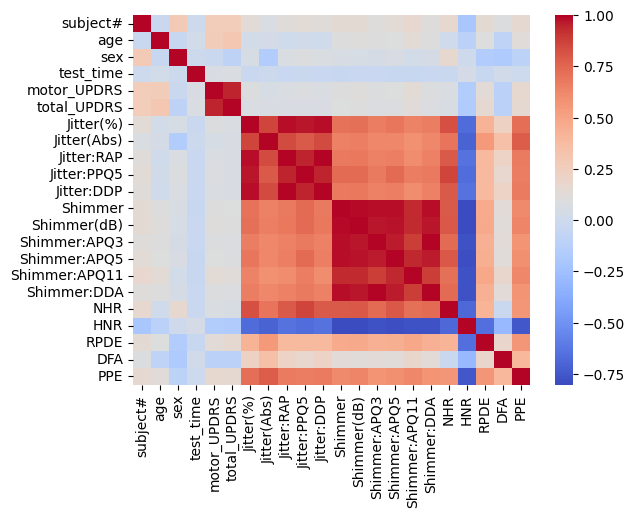

In [68]:
corr_matrix = parkinsons_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

The correlation matrix shows the pairwise correlations between all variables in the data. A heatmap is a good way to visualize the correlations because it allows us to quickly see which variables are positively or negatively correlated.


**Distribution Plots**

We will also generate distribution plots of several variables in the data using Seaborn's histplot() method:

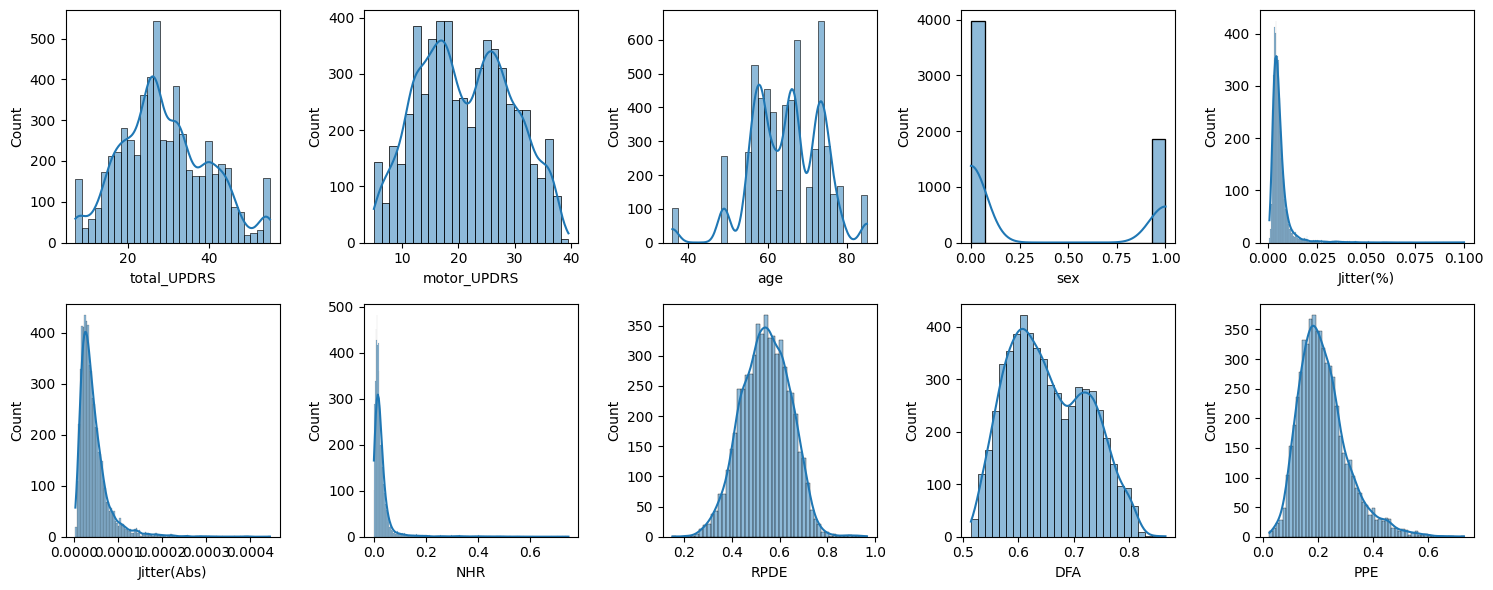

In [69]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
sns.histplot(data=parkinsons_data, x='total_UPDRS', kde=True, ax=axs[0, 0])
sns.histplot(data=parkinsons_data, x='motor_UPDRS', kde=True, ax=axs[0, 1])
sns.histplot(data=parkinsons_data, x='age', kde=True, ax=axs[0, 2])
sns.histplot(data=parkinsons_data, x='sex', kde=True, ax=axs[0, 3])
sns.histplot(data=parkinsons_data, x='Jitter(%)', kde=True, ax=axs[0, 4])
sns.histplot(data=parkinsons_data, x='Jitter(Abs)', kde=True, ax=axs[1, 0])
sns.histplot(data=parkinsons_data, x='NHR', kde=True, ax=axs[1, 1])
sns.histplot(data=parkinsons_data, x='RPDE', kde=True, ax=axs[1, 2])
sns.histplot(data=parkinsons_data, x='DFA', kde=True, ax=axs[1, 3])
sns.histplot(data=parkinsons_data, x='PPE', kde=True, ax=axs[1, 4])

plt.tight_layout()
plt.show()

**Hypothesis Testing**

Finally, we will perform a hypothesis test to compare the means of total_UPDRS between men and women:

In [70]:
male_total_UPDRS = parkinsons_data[parkinsons_data['sex'] == 0]['total_UPDRS']
female_total_UPDRS = parkinsons_data[parkinsons_data['sex'] == 1]['total_UPDRS']
t_stat, p_value = stats.ttest_ind(male_total_UPDRS, female_total_UPDRS)

if p_value < 0.05:
    print('We reject the null hypothesis. There is significant evidence of a difference in total_UPDRS between men and women.')
else:
    print('We cannot reject the null hypothesis. There is not enough evidence of a difference in total_UPDRS between men and women.')

We reject the null hypothesis. There is significant evidence of a difference in total_UPDRS between men and women.


Based on the results of the t-test with a significance level of 0.05, we can conclude that there is a significant difference in total_UPDRS scores between men and women with Parkinson's disease. The rejection of the null hypothesis suggests that the difference observed in the means of the two groups is not due to chance alone, but rather to a real difference in the population means.

Furthermore, since the t-value is positive, we can infer that the mean total_UPDRS score for men is greater than that for women. However, it is important to note that this difference may not necessarily imply causation and further research is needed to investigate potential confounding factors.